<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Programming_06_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's Time to Play Ball (with `matplotlib`)!
### Brendan Shea, PhD

Matplotlib is a powerful and versatile plotting library in Python, widely used for data visualization. It's an essential tool in the toolbox of any data scientist, engineer, or analyst. Matplotlib provides a wide range of plotting functions that make it easy to create static, animated, and interactive visualizations. It excels in making complex tasks simple and straightforward, turning raw data into clear, comprehensible visuals.

One of the strengths of Matplotlib is its ability to integrate with other Python libraries like NumPy and Pandas, allowing for efficient data manipulation and visualization. Whether you're working on a detailed scientific plot, a histogram for statistical data, or a simple line chart, Matplotlib has the functionality you need.

Some main types of graphics supported by matplotlib include the following.

| Type of Graph | Description |
| --- | --- |
| Line Graph | Useful for showing trends over time. |
| Bar Chart | Ideal for comparing quantities among different groups. |
| Histogram | Best for showing the distribution of a dataset. |
| Scatter Plot | Excellent for observing the relationship between two variables. |
| Pie Chart | Suitable for displaying data proportions in a whole. |
| Box Plot | Efficient for depicting groups of numerical data through their quartiles. |
| Heatmap | Great for representing data density or intensity of variables, revealing patterns in complex datasets. |

Imagine a sport popular among Munchkins in the land of Oz, called "Emerald Ball." In this game, players score points by tossing a magical ball into various enchanted hoops. Let's visualize the average scores of top Munchkin players using Matplotlib.

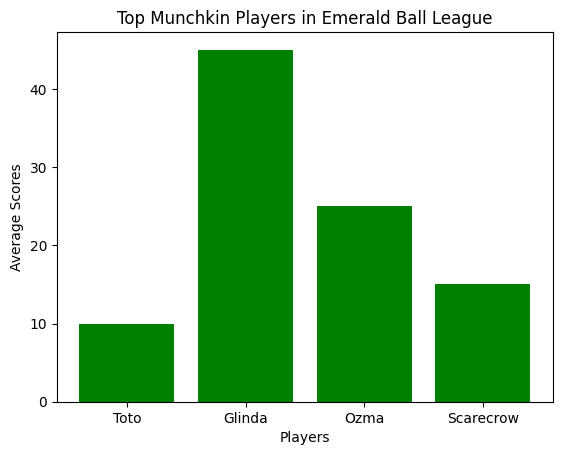

In [54]:
import matplotlib.pyplot as plt

# Sample data for Munchkin players
players = ['Toto', 'Glinda', 'Ozma', 'Scarecrow']
average_scores = [10, 45, 25, 15]

plt.bar(players, average_scores, color='green')
plt.xlabel('Players')
plt.ylabel('Average Scores')
plt.title('Top Munchkin Players in Emerald Ball League')
plt.show()


In this example:

-   We import the `matplotlib.pyplot` module, a primary module in Matplotlib used for plotting graphs.
-   The `players` list contains the names of the players, and `average_scores` represents their corresponding scores.
-   `plt.bar()` creates a bar chart, with `players` on the x-axis and `average_scores` on the y-axis.
-   The `color` parameter in `plt.bar()` is set to 'green', aligning with the emerald theme of Oz.
-   `plt.xlabel()` and `plt.ylabel()` add labels to the x-axis and y-axis, respectively.
-   `plt.title()` provides a title to the bar chart.
-   Finally, `plt.show()` displays the plot.


In this chapter, we'll be exploring how to create a variety of visualizations.

## Intro the Baseball Data Set
In order to demonstrate the functionality of `matplotlib`, we'll explore the widely used  `baseball` dataset. This data set encapsulates the yearly batting records of major league baseball players, serves as an ideal resource for exploring rich, numeric data in the context of data science education. This dataset, sourced from <http://www.baseball-databank.org/> (now defunct), encompasses 21,699 records and covers 1,228 players spanning the years 1871 to 2007. Its inclusion criteria emphasize players with more than 15 seasons of play, ensuring a wealth of longitudinal data.

### Why Use This Dataset?
I realize many of you may not know much about baseball, and that's OK! Here's the idea behing using this data.

1.  The dataset's extensive range of variables and historical depth provides a fertile ground for applying various data science techniques for anaylsis and visualization.

2. The dataset is predominantly numeric, a trait that simplifies certain types of analysis and visualization, especially for beginners.

3. Baseball, as a sport, is quantitatively driven, making this dataset an exemplary case for understanding how data analysis can offer insights into real-world scenarios.

### Dataset Format

The dataset is structured as a data frame with dimensions 21,699 x 22, meaning it contains 21,699 records across 22 variables.
### Key Variables

-   id: A unique identifier for each player.
-   year: The specific year of the record.
-   team, lg: Information about the team and league.
-   g, ab, r: Game statistics including the number of games, times at bat, and runs.
-   h, X2b, X3b, hr: Hit details, including total hits and hits resulting in reaching different bases.
-   rbi, sb, cs: Runs batted in and base-stealing statistics.
-   bb, so, ibb: Walks and strikeouts, both intentional and overall.
-   hbp, sh, sf, gidp: Other batting statistics like hits by pitch and sacrifice hits.

This dataset is included in the `pydataset` package, which include hundreds of pre-formatted datasets intended for educational purposes. Here's how we do this.

In [55]:
# Load the "baseball" dataset
!pip install pydataset -q # Install required packages
from pydataset import data
import pandas as pd

baseball_df = data('baseball')

Now, we are going to **"clean"** the data to prepare it for further analysis. Here, we are focusing on players after 1900, and dropping columns that have significant numbers of **null** (missing) values.

In [56]:
# drop players before 1914 (when Babe Ruth started)
baseball_df = baseball_df[baseball_df.year >= 1914]
# drop ibb, sf, cs, gidp
baseball_df = baseball_df.drop(columns=['ibb', 'sf', 'cs', 'gidp'])

## Basic Data Exploration
Let's take a brief look our cleaned data before moving on to visualizations.

In [57]:
# Display the first few records
baseball_df.head()

,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,bb,so,hbp,sh
14423,ainsmed01,1914,1,WS1,AL,62,151,11,34,7,0,0,13.0,8.0,9,28.0,1.0,1.0
14425,altroni01,1914,1,WS1,AL,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
14427,austiji01,1914,1,SLA,AL,130,466,55,111,16,4,0,30.0,20.0,40,59.0,1.0,16.0
14441,bendech01,1914,1,PHA,AL,28,62,4,9,1,0,1,8.0,0.0,4,13.0,0.0,4.0
14460,bressru01,1914,1,PHA,AL,29,51,6,11,1,1,0,4.0,0.0,6,7.0,1.0,2.0


In [58]:
# Information about data types and missing values
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 14423 to 89534
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      19194 non-null  object 
 1   year    19194 non-null  int64  
 2   stint   19194 non-null  int64  
 3   team    19194 non-null  object 
 4   lg      19194 non-null  object 
 5   g       19194 non-null  int64  
 6   ab      19194 non-null  int64  
 7   r       19194 non-null  int64  
 8   h       19194 non-null  int64  
 9   X2b     19194 non-null  int64  
 10  X3b     19194 non-null  int64  
 11  hr      19194 non-null  int64  
 12  rbi     19194 non-null  float64
 13  sb      19194 non-null  float64
 14  bb      19194 non-null  int64  
 15  so      19194 non-null  float64
 16  hbp     19192 non-null  float64
 17  sh      19194 non-null  float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.8+ MB


Our cleaned data contains information about baseball players, including their id, year, stint, team, league, games played, at bats, runs, hits, doubles, triples, home runs, runs batted in, stolen bases, walks, strikeouts, hit by pitch, and sacrifice hits. There are 19194 rows and 18 columns. There are no missing values in the data except for hbp, which has 2 missing values.

In [59]:
round(baseball_df.describe())

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,bb,so,hbp,sh
count,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19194.0,19192.0,19194.0
mean,1969.0,1.0,72.0,216.0,30.0,59.0,10.0,2.0,6.0,28.0,4.0,22.0,30.0,1.0,3.0
std,25.0,0.0,52.0,217.0,35.0,64.0,12.0,3.0,9.0,34.0,9.0,27.0,32.0,2.0,5.0
min,1914.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1952.0,1.0,29.0,19.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0
50%,1975.0,1.0,55.0,107.0,11.0,25.0,4.0,0.0,1.0,12.0,0.0,9.0,19.0,0.0,1.0
75%,1990.0,1.0,125.0,424.0,55.0,115.0,19.0,3.0,8.0,50.0,4.0,38.0,46.0,2.0,4.0
max,2007.0,4.0,165.0,705.0,177.0,257.0,64.0,26.0,73.0,184.0,130.0,232.0,189.0,35.0,48.0


The output of `basebuall.describe()` provides a statistical summary of the baseball dataset, encompassing various performance metrics for players. Here's a summary of (a few of) the key insights we can draw from this data:

1.  The cleaned dataset covers records from 19,194 entries, indicating a substantial historical range, specifically from the year 1914 to 2007. This wide temporal range allows for analysis of trends and changes in baseball statistics over nearly a century.

2.  Central Tendency and Dispersion:

    -   The mean year of the dataset is 1969, with a standard deviation of 25 years, reflecting the mid-20th-century focus of the data.
    -   Players, on average, participated in 72 games per season, with a significant variation (standard deviation of 52 games), indicating a wide range in the number of games played by different players.
    -   The average at-bats (AB) is 216, with a high standard deviation (217), suggesting a broad distribution of player activity levels, from those with very few at-bats to those who are highly active.
    -   Runs (R), hits (H), doubles (2B), triples (3B), home runs (HR), and runs batted in (RBI) have their respective averages and standard deviations, illustrating the varied performance among players. For instance, the average hits are 59 with a standard deviation of 64, highlighting the disparity in hitting success.
3.  Minimum and Maximum Values:

    -   The dataset includes players with no game participation (min games, at-bats, runs, etc., are 0) up to highly active players (max games played is 165, max at-bats is 705).
    -   The range in performance metrics like home runs (from 0 to 73) and stolen bases (from 0 to 130) showcases the diversity of player skills and roles.
4.  Quartiles:

    -   The 25th, 50th (median), and 75th percentiles provide insights into the distribution of each statistic. For example, 25% of the players have 19 or fewer at-bats, while 75% have 424 or fewer, indicating a skewed distribution where a smaller number of players have a very high number of at-bats.
    -   The median values (50th percentile) for runs, hits, and home runs are 11, 25, and 1, respectively, suggesting that the median player has modest performance metrics.
5.  Data Completeness and Anomalies:

    -   The count for most statistics is 19,194, except for hit by pitch (HBP) which has two missing values (19,192). This slight discrepancy indicates almost complete data but highlights the need for careful handling of missing values in analysis.

From this summary, we learn about the dataset's comprehensive coverage of baseball statistics over a significant period, the variability in player performance, and the distribution of these performances across different metrics. The statistical summary also underscores the importance of considering both central tendencies and variability when analyzing player data, as well as the need to address any data completeness issues.

## Line Graphs Display Change Over Time
**Line graphs** are essential tools for displaying trends and changes over time. They connect individual data points in a sequence, typically along two axes, creating a 'line' that represents the data's trajectory. Line graphs are most effective when tracking changes across evenly spaced intervals, like time. They are commonly used in various fields such as finance, science, and economics to track stock prices, temperature changes, or market trends over time.

The reason to use a line graph is its clarity in showcasing the direction and rate of change. It helps in identifying trends, patterns, and potential anomalies. For example, in environmental studies, a line graph could illustrate the change in average global temperatures over the decades.

### Creating Line Graphs with Pandas

Pandas integrates seamlessly with Matplotlib for plotting purposes. The beauty of Pandas is its simplicity in converting DataFrame columns into graphical representations. The general syntax to create a line graph directly from a Pandas DataFrame is:

```python
DataFrame.plot.line(
  x='x_column', # required
  y='y_column', # required
  figsize=(width, height), # optional
  grid=True,  # optional
  title='Your Title',  # optional
  xlabel='X-axis Label', # optional
  ylabel='Y-axis Label') # optional
```

Where:

-   `x='x_column'` specifies the column for the x-axis.
-   `y='y_column'` is the column for the y-axis.
-   `figsize` determines the size of the plot.
-   `grid` adds a grid for easier reading.
-   `title`, `xlabel`, and `ylabel` provide context through labels and titles.

For example, `baseball_df`  includes data on home runs ('hr') per year. To visualize the trend of home runs over the years, you can use the following code:

In [61]:
# First, group the data by 'year' and calculate the max home runs ('hr') for each year
yearly_max_home_runs = baseball_df.groupby('year')['hr'].max().reset_index()
yearly_max_home_runs.head(10)

,year,hr
0,1914,15
1,1915,17
2,1916,12
3,1917,9
4,1918,11
5,1919,29
6,1920,54
7,1921,59
8,1922,42
9,1923,41


The above code uses the `.groupby()` method to group the DataFrame by the year column. This operation essentially separates the data into groups based on the values in the specified column.

After grouping by year, the code uses the `.max()` method to find the maximum value in the hr column for each group. This calculates the maximum number of home runs hit in each year.

Finally, the `.reset_index()` method is used to convert the grouped data back into a regular DataFrame, where each row represents individual data points again. The result is stored in the yearly_max_home_runs variable.

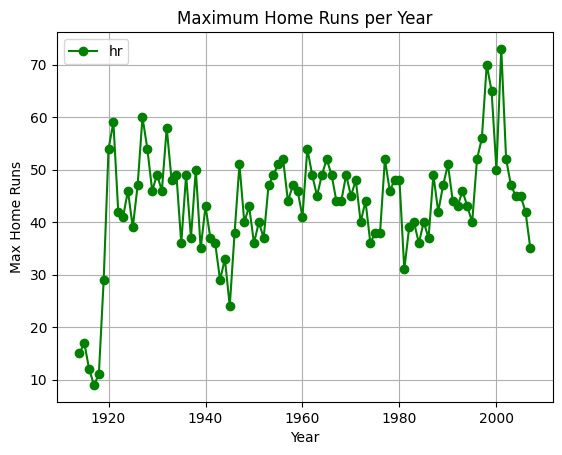

In [ ]:

# Create a line plot for the maximum home runs per year
yearly_max_home_runs.plot.line(
                          x='year',
                          y='hr',
                          color='green',
                          marker='o',
                          title='Maximum Home Runs per Year')

plt.xlabel('Year')
plt.ylabel('Max Home Runs')
plt.grid(True)
plt.show()

This line graph represents the maximum number of home runs hit by a single player in each year. The x-axis shows the years, and the y-axis shows the maximum number of home runs. Each point on the graph corresponds to the highest home run total achieved by an individual player in that particular year.  From the graph, we can observe several interesting patterns:

1.  There is considerable fluctuation in the maximum number of home runs hit from year to year. This could be due to a variety of factors, including changes in player abilities, pitching quality, baseball park dimensions, ball composition, or even the prevalent hitting strategies of the times.

2.  There are distinct peaks where the maximum home runs spike significantly. These peaks could correspond to standout seasons by some of baseball's most prolific home run hitters.

3.  Despite the variability, there does not appear to be a clear upward or downward trend over the decades, suggesting that while the game of baseball may have evolved, the capacity for individual players to hit a high number of home runs in a season has remained relatively consistent.

4.  The peak in the late 1990s into the early 2000s could potentially be linked to the so-called "steroid era" in baseball, where the use of performance-enhancing drugs was reportedly widespread.

## Scatterplots Show Relationships Between Numeric Variables
A scatter plot is a type of data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. Scatter plots are particularly useful for identifying the type and strength of the relationship between two variables. If the data points make a line or curve when plotted, it indicates that a relationship exists. For instance, a scatter plot can help determine if an increase in one variable correlates with an increase (or decrease) in another, indicating a positive or negative correlation.

Scatter plots are widely used in statistics, economics, and the natural sciences. For example, in healthcare, scatter plots can illustrate the relationship between exercise frequency and blood pressure levels. They allow researchers to visually assess correlations and can serve as a preliminary indicator of potential causal relationships.

### Creating Scatter Plots with Pandas

Pandas provides a convenient method to create scatter plots directly from a DataFrame, utilizing the `plot()` function, which is highly customizable with various parameters. The general syntax to create a scatter plot is:

```python
DataFrame.plot.scatter(
  x='x_column', # required
  y='y_column', # required
  c='color', # optional
  s='size', # optional
  title='Your Title' # optional)

```

Where:

-   `x='x_column'` denotes the column to be used for the x-axis.
-   `y='y_column'` denotes the column to be used for the y-axis.
-   `c='color'` allows you to specify the color of the markers.
-   `s='size'` sets the size of the markers.
-   `title='Your Title'` adds a title to the scatter plot.


Let's say we want to analyze the relationship between at-bats ('ab') and hits ('h') for players in the baseball dataset. The following code block demonstrates how you might create a scatter plot for this purpose:

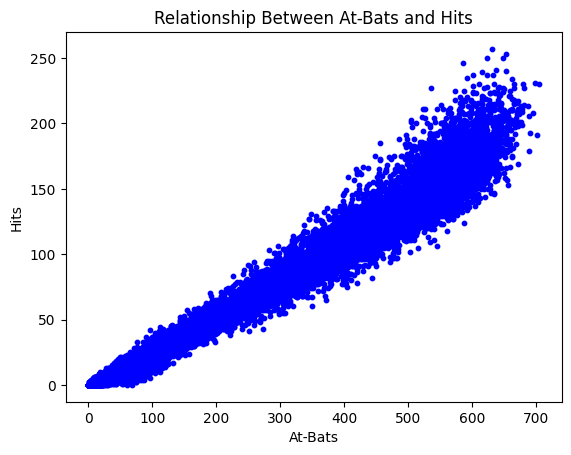

In [ ]:
# Plotting the scatter plot
baseball_df.plot.scatter(
    x='ab',
    y='h',
    c='blue',
    s=10,
    title='Relationship Between At-Bats and Hits',
    xlabel = 'At-Bats',
    ylabel = 'Hits')

plt.show()


This shows a *very* strong relationship between the two variables, which isn't surprising -- more chances to hit ("at bats") generally lead to more hits.

## Bar Charts for Comparing Numeric Variables By Category
 A bar chart is a graphical representation used to compare the size of different data points or categories using bars. Each bar's length (or height, in the case of horizontal bars) is proportional to the value it represents. Bar charts are particularly effective for comparing discrete categories or groups. In a bar chart, one axis represents the categories being compared, and the other axis represents a value scale. They are best used when you want to show differences between groups, rather than changes over time, which are better represented by a line graph.

Bar charts are a staple in business, science, and education for their clarity and ease of interpretation. They can highlight differences between groups, such as the sales performance of different products or the population of various cities.

### Creating Bar Charts with Pandas

Pandas, coupled with Matplotlib, makes it straightforward to create bar charts from a DataFrame. The `plot()` function can be used with the `kind='bar'` parameter to create vertical bar charts or `kind='barh'` for horizontal bar charts. Here is the general syntax for creating a bar chart using Pandas:

```python
DataFrame.plot(
  kind='bar', # required
  x='category_column', # required
  y='value_column', # required
  color='color', # optional
  title='Your Title', # optional
  legend=True)
```

Where:

-   `kind='bar'` specifies that you want to create a bar chart.
-   `x='category_column'` is the column that contains the categories.
-   `y='value_column'` is the column that contains the numerical data.
-   `color='color'` sets the color of the bars.
-   `title='Your Title'` adds a title to the bar chart.
-   `legend=True` includes a legend to identify data series.



Now, let's create a bar chart to display the top 10 overall run scorers in the `baseball_df` DataFrame. We'll need to aggregate the total runs scored by each player and then sort these totals to find the top scorers:

In [ ]:
# Group by playerID and sum the runs
player_total_runs = baseball_df.groupby('id')['r'].sum().sort_values(ascending=False)

# Select the top 10 run scorers
top_scorers = player_total_runs.head(10)

top_scorers

id
henderi01    2295
bondsba01    2227
aaronha01    2174
ruthba01     2174
rosepe01     2165
mayswi01     2062
musiast01    1949
gehrilo01    1888
ottme01      1859
biggicr01    1844
Name: r, dtype: int64

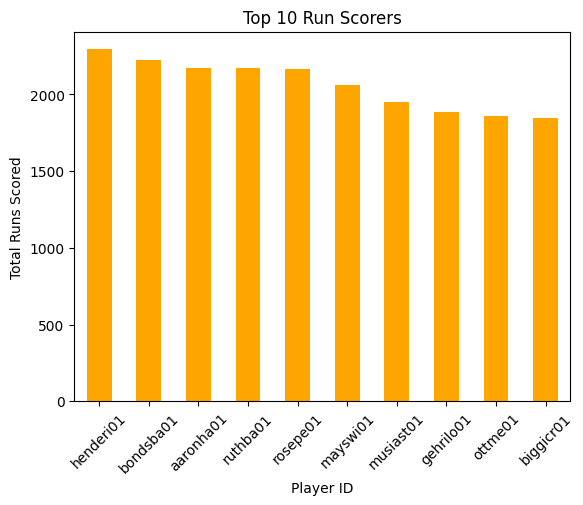

In [ ]:
# Plotting the bar chart
top_scorers.plot.bar(
    color='orange',
    title='Top 10 Run Scorers',
    xlabel='Player ID',
    ylabel='Total Runs Scored')

plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()

The bar chart depicting the top 10 run scorers in our baseball dataset reveals a list of legendary players, each with a remarkable number of runs scored throughout their careers. Leading the chart is Rickey Henderson (henderi01) with 2,295 runs, followed closely by Barry Bonds (bondsba01) with 2,227 runs. Not far behind are Hank Aaron (aaronha01) and Babe Ruth (ruthba01), both tied with 2,174 runs. Pete Rose (rosepe01) rounds out the top five with 2,165 runs. Further down the list, we have Willie Mays (mayswi01) with 2,062 runs, Stan Musial (musiast01) with 1,949 runs, Lou Gehrig (gehrilo01) with 1,888 runs, Mel Ott (ottme01) with 1,859 runs, and Craig Biggio (biggicr01) with 1,844 runs.

## Exercises
Exercise 1: Create a line chart that displays the evolution of a player's batting average over their career.
Instructions:

1. Add a "batting average" column the baseball_df data frame. It can be calculated by dividing the number of hits ('h') by the number of at-bats ('ab').
2.  Choose a player from the `baseball_df` DataFrame by filtering the data using the 'playerID' column.
3.  Plot a line chart with years on the x-axis and the calculated batting average on the y-axis.
4.  Make sure to include a title for the chart, such as "Career Batting Average of [Player Name]".
5.  Label the x-axis as "Year" and the y-axis as "Batting Average".
6.  Choose a color for the line.

In [ ]:
# Your code here

Exercise 2. Create a scatter plot tracking the number of strikeouts versus home runs hit by players in a single season. Instructions:

1.  Use the `baseball_df` DataFrame to select the 'so' (strikeouts) and 'hr' (home runs) columns for a specific year.
2.  Create a scatter plot with strikeouts on the x-axis and home runs on the y-axis.
3.  Include a title for the chart, like "Relationship Between Strikeouts and Home Runs in [Year]".
4.  Label the x-axis as "Strikeouts" and the y-axis as "Home Runs".
5.  Assign a color to the data points.

In [ ]:
# Your code here.

Exercise 3: Create a bar char identifying the 10 players with the most stolen bases in a single season. Instructions:

1.  Filter the `baseball_df` DataFrame for a particular year using the 'year' column.
2.  Group the data by 'playerID' and sum the 'sb' (stolen bases).
3.  Sort the players by the total stolen bases in descending order and select the top 10.
4.  Create a bar chart to display these top 10 players with their corresponding stolen base totals.
5.  Title the chart "Top 10 Players with Most Stolen Bases in [Year]".
6.  Label the x-axis with "Player ID" and the y-axis with "Stolen Bases".
7.  Choose a distinct color for the bars.

## Histograms SHow the Distribution of One Numerical Variable
A histogram is a graphical representation that organizes a group of data points into user-specified ranges. Similar to a bar chart, a histogram plots the frequency of data points within certain ranges. It is particularly useful for understanding the distribution of numerical data and identifying patterns such as skewness, peaks, and outliers. Histograms are invaluable in statistical analysis for assessing the probability distribution of a dataset.

For example, in an educational setting, a histogram could be used to display the distribution of test scores to understand the overall performance of students. In environmental science, a histogram might show the frequency of temperature readings, helping to visualize climate data.

### Creating Histograms with Pandas

Pandas provides functionality to easily create histograms from a DataFrame using the `hist()` method, allowing for quick exploration of the data distribution. Here's how you can generate a histogram:

```python
DataFrame['numerical_column'].plot.hist(
  bins=number_of_bins,
  color='color',
  edgecolor='edge_color',
  figsize=(width, height))
```

In this syntax:

-   `DataFrame['numerical_column']` specifies the column with numerical data to be distributed across bins.
-   `bins` controls the number of bins (intervals) you want to divide your data into.
-   `color` specifies the color of the bars in the histogram.
-   `edgecolor` defines the color of the edge line of each bar.
-   `figsize` determines the size of the figure.

For example, we can create a histogram tracking strikeouts as follows:

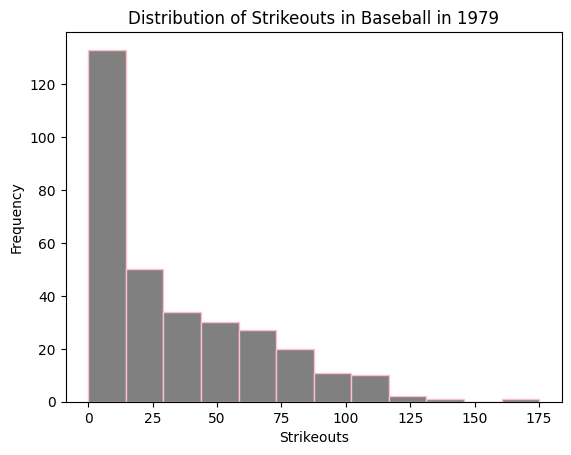

In [ ]:
# Filter for a specific year
year = 1979  # Feel free to change this
baseball_year = baseball_df[baseball_df.year == year]

# Creating the histogram

baseball_year['so'].plot.hist(
    bins=12,
    color='grey',
    edgecolor='pink',
    xlabel = 'Strikeouts',
    ylabel = 'Frequency',
    title = f'Distribution of Strikeouts in Baseball in {year}'
    )

# For whatever reason, we need to use "native" matplotlib
# To get x-labels to show.

plt.xlabel('Strikeouts')

plt.show()


This histogram displays the distribution of strikeouts recorded by players in the 1979 baseball season. Each bar represents the number of players (frequency) that fall within a range of strikeouts.  Here are a few interpretations of the graph:

1.  The histogram shows a **right-skewed distribution**. Most players have a relatively low number of strikeouts, and as the number of strikeouts increases, the number of players decreases.

2. The tallest bar is the first one, indicating that the majority of players had between 0 to just under 25 strikeouts during the 1979 season.

3.   As the number of strikeouts increases, the frequency of players with those strikeouts decreases. This is indicated by the decreasing height of the bars as you move right along the x-axis.

4.  Players with a very high number of strikeouts (over 125) are quite rare, as shown by the very short bars on the far right of the histogram.

5. The histogram suggests that relatively few players have an exceptionally high number of strikeouts, which could be considered outliers. These would be interesting cases for further analysis to understand what might contribute to such high strikeout counts.

6. The horizontal axis shows the range of strikeouts grouped into bins (the exact range of each bin depends on the data and how the histogram was constructed). It appears that the bin size might be around 25 strikeouts.

This histogram helps to understand the overall tendency for strikeouts among players in the 1979 baseball season, indicating that most players tended to have fewer strikeouts, with only a few reaching very high numbers.

## Subplots Show Many Figures
Subplots are a feature in Matplotlib that allows you to place multiple plots in a single figure. Each subplot operates independently within the figure, with its own axes and title. This is particularly useful when you want to compare several distributions or trends side-by-side without creating separate figures for each. Subplots provide a cohesive view of the data, making it easier to analyze and draw comparisons between different variables or datasets.

In the context of education, subplots could be used to compare the performance of students across several tests. In business, they could compare sales data across different quarters or regions simultaneously. Subplots are a versatile tool that can enhance the analytical depth of your data visualization.

### Creating Subplots with Matplotlib

To create subplots, you'll typically use the `subplots()` function from Matplotlib, which initializes a grid of subplots. Here's a basic approach:

```python
fig, ax = plt.subplots(
  nrows=number_of_rows,
  ncols=number_of_columns,
  figsize=(width, height))
```

-   `nrows` and `ncols` specify the number of rows and columns in the subplot grid.
-   `figsize` determines the size of the entire figure that houses all subplots.
-   `fig` is the entire figure object.
-   `ax` is an array of axes objects, which are the individual subplots within the figure.

Each element in `ax` can be used to create a plot just like you would on a single figure. If you have a 2x2 grid of subplots, `ax` will be a 2x2 NumPy array with each element corresponding to a subplot.

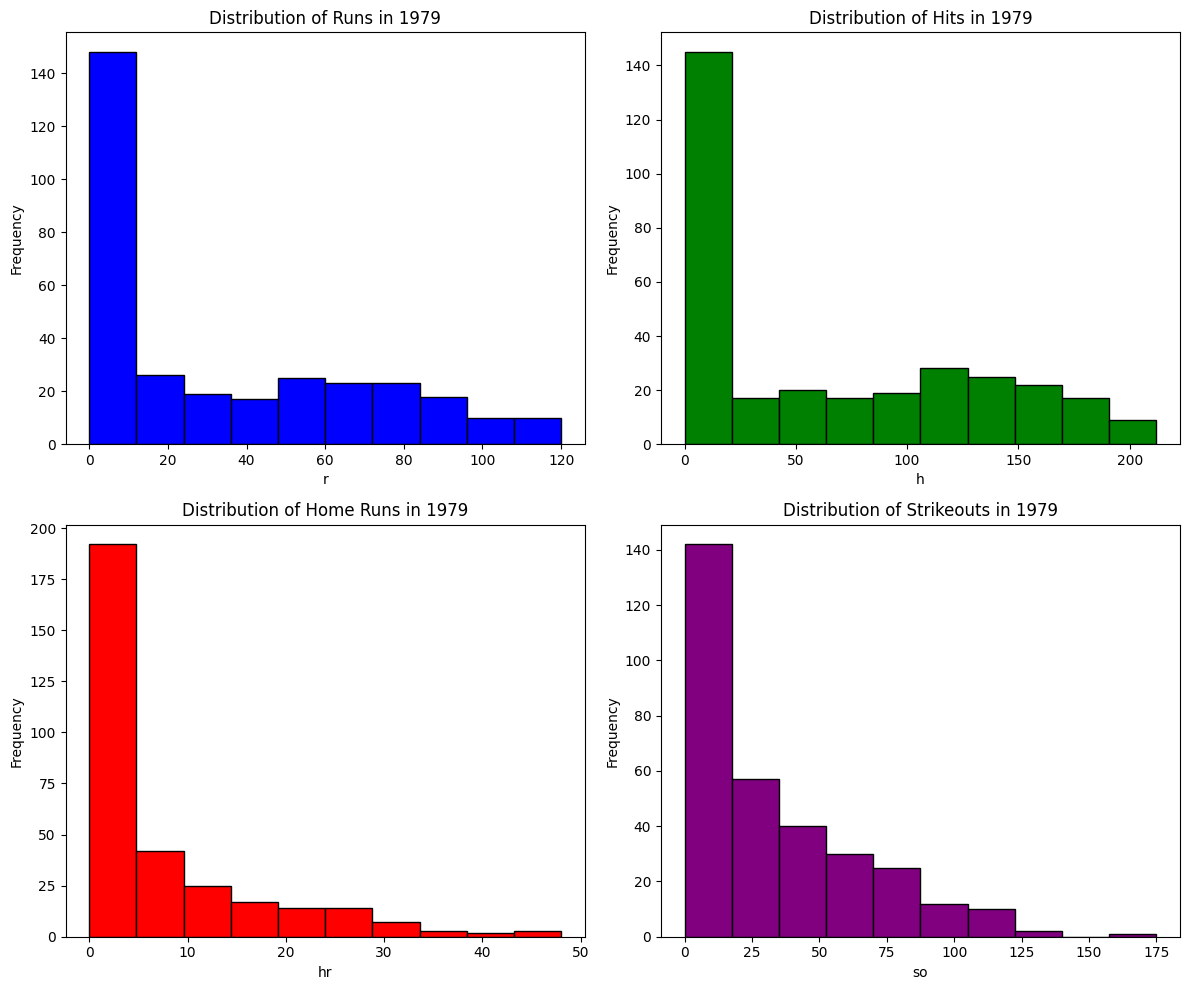

In [ ]:
# Filter for a specific year
year = 1979  # This can be dynamically changed
baseball_year = baseball_df[baseball_df.year == year]

# Function to plot histogram on specified axes
def plot_stat_histogram(df, stat, ax, color, title):
    df[stat].plot.hist(bins=10, color=color, edgecolor='black', ax=ax, title=title)
    ax.set_xlabel(stat)
    ax.set_ylabel('Frequency')

# Set up a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Statistics to plot: (column name, subplot index, color)
stats_to_plot = [
    ('r', (0, 0), 'blue', 'Runs'),
    ('h', (0, 1), 'green', 'Hits'),
    ('hr', (1, 0), 'red', 'Home Runs'),
    ('so', (1, 1), 'purple', 'Strikeouts')
]

# Loop through the stats_to_plot to plot each histogram
for stat, index, color, label in stats_to_plot:
    plot_stat_histogram(baseball_year, stat, axes[index], color, f'Distribution of {label} in {year}')

# Adjust the layout so that all subplots fit into the figure neatly
plt.tight_layout()
plt.show()

In this (relatively short) code block, we do a few different things you might not have seen before:

1.  We *filter* data to select data from a specific year within a DataFrame. The expression `baseball_year = baseball_df[baseball_df.year == year]` filters `baseball_df` to only include rows where the `year` column matches the specified `year`, storing the result in `baseball_year`.

2.  The function `plot_stat_histogram(df, stat, ax, color, title)` encapsulates the process of plotting a histogram for a given statistic. It uses `df[stat].plot.hist(bins=10, color=color, edgecolor='black', ax=ax, title=title)` to draw the histogram on the specified subplot `ax`, with customization options for bin size, color, and edge color. It sets the subplot's title and labels for the x and y axes to represent the statistic and its frequency.

3. The line `fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))` initializes a 2x2 grid of subplots. `fig` refers to the entire figure, and `axes` is an array of subplot axes, which are used to plot individual histograms.

4. By iterating over a predefined list of tuples in `stats_to_plot`, each containing details for plotting (statistic name, subplot position, color, and label), the loop `for stat, index, color, label in stats_to_plot:` calls `plot_stat_histogram` for each statistic. This approach minimizes redundancy and simplifies the addition or modification of plots.

5.  `plt.tight_layout()` is used to automatically adjust the subplot parameters to give some padding and prevent overlap. `plt.show()` then displays the final figure with all histograms plotted according to the specified configurations.

## Grouped Box Plots Show Numerical Variables by Category
A grouped box plot is a graphical display that depicts several box plots of different categories side-by-side on the same chart. It is used to compare the distribution of a numerical variable across different groups. Each box plot shows the median, quartiles, and potential outliers for a set of data, making it easy to compare the central tendency and spread across different categories.  Grouped box plots are extremely useful in many fields. For instance, in market research, they can compare customer satisfaction scores across different products. In medicine, they could compare patient responses to different medications.

### Creating Grouped Box Plots with Pandas

Pandas and Matplotlib together make it straightforward to create grouped box plots. The process involves using the `boxplot` method and specifying the columns for grouping. Here's how to create a grouped box plot:

```python
DataFrame.boxplot(
    column='numerical_column', # required
    by='grouping_column', # required
    grid=True, # optional
    figsize=(width, height), # optional
    layout=(rows, columns), # optional
    title='Your Title' # optional
)
```

In this syntax:

-   `column` specifies the numerical data column for the y-axis.
-   `by` specifies the grouping column(s) for the x-axis.
-   `grid` adds a grid to the chart.
-   `figsize` determines the overall size of the chart.
-   `layout` specifies the layout of multiple box plots if there are several grouping columns.
-   `title` adds a title to the chart.

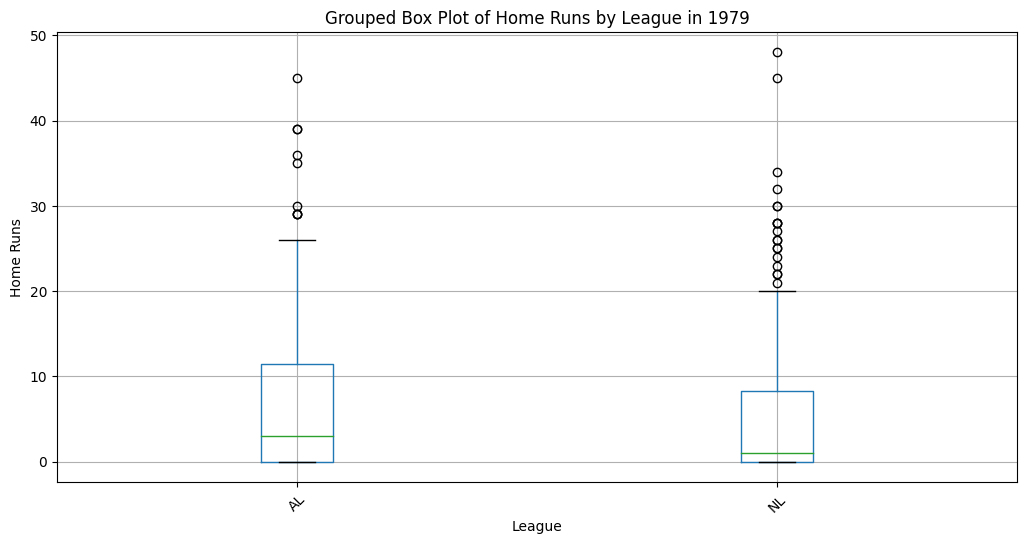

In [ ]:
# Filter for a specific year
year = 1979  # Feel free to change this
baseball_year = baseball_df[baseball_df.year == year]

# Grouping 'hr' by 'team' and creating a box plot
baseball_year.boxplot(
    column='hr',
    by='lg',
    grid=True,
    figsize=(12, 6))

plt.xlabel('League')
plt.ylabel('Home Runs')
plt.title(f'Grouped Box Plot of Home Runs by League in {year}')
plt.suptitle('')  # Suppresses the automatic subtitle to avoid duplication
plt.xticks(rotation=45)  # Rotates the x-axis labels for readability
plt.show()


This grouped box plot displays the distribution of home runs by players in two different leagues, the American League (AL) and the National League (NL), during the 1979 baseball season. Here's how to interpret the components of the box plot:

1.  The horizontal line within each box represents the **median** number of home runs in each league. It appears that the median is slightly higher in the AL than in the NL.

2.  The box itself shows the **interquartile range**, which contains the middle 50% of the data. The IQR is from the first quartile (25th percentile) to the third quartile (75th percentile). Both leagues have a similar IQR, suggesting a similar spread of data in the middle 50%.

3.  The lines (or **whiskers**) extending from the top and bottom of each box indicate the range of the data, excluding outliers. The AL shows a longer upper whisker, which suggests a wider distribution of the data towards the higher number of home runs.

4.  The individual points above and below the whiskers are **outliers**. These are data points that fall significantly higher or lower than the rest of the distribution. There are several outliers in both leagues, but the NL has a higher frequency of outliers, indicating more players with exceptionally high home run totals.

5. When comparing the two leagues, it can be observed that the AL has a slightly higher median, suggesting players in the AL might have been more likely to hit a greater number of home runs. The NL, while having a similar median, shows more variability in the upper range of home runs due to the greater number of outliers.

From this plot, we can conclude that while the typical (median) number of home runs per player was similar in both leagues, the spread and outliers varied, with the NL showing a greater dispersion in the number of home runs among players with unusually high numbers. This could point to a few standout sluggers in the NL for that year.

## Exercises
Exercise 4: Construct a histogram of walks (BB) for players in a selected year.

1.  Choose a year from the `baseball_df` DataFrame to focus on by filtering the data using the 'year' column.
2.  Select the 'bb' (base on balls or walks) column for the chosen year.
3.  Create a histogram to visualize the distribution of walks among players for that year.
4.  Include a title for the chart, such as "Distribution of Walks Among Players in [Year]".
5.  Label the x-axis as "Number of Walks" and the y-axis as "Frequency of Players".
6.  Choose an appropriate number of bins to effectively display the distribution.

Exercise 5: Use subplots to compare stolen bases (SB) and runs (R) in a selected year.

1.  Choose a year from the `baseball_df` DataFrame to analyze.
2.  Use the `subplots()` function to create a 1x2 subplot layout (one row, two columns).
3.  On the first subplot, create a histogram of stolen bases ('sb') for the chosen year.
4.  On the second subplot, create a histogram of runs ('r') for the same year.
5.  Make sure both subplots have titles reflecting the data they are displaying, like "Stolen Bases in [Year]" and "Runs in [Year]".
6.  Label the axes appropriately for each subplot.
7.  Choose different colors for each histogram for visual distinction.

Exercise 6: Generate a grouped box plot of on-base percentage (OBP) by league in a selected Year.

1.  Calculate the On-Base Percentage (OBP) for each player for the chosen year. OBP is calculated as (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). You will need to add these columns if not already present in `baseball_df`.
2.  Group the data by the 'lg' (league) column and the selected year.
3.  Create a grouped box plot to compare the distribution of OBP between the two leagues.
4.  Title the chart "Comparison of On-Base Percentage by League in [Year]".
5.  Label the x-axis as "League" and the y-axis as "On-Base Percentage".
6.  Identify any outliers with a different marker color or style.

## When to Use Different Types of Visualizations
We've covered a number of different visualizations in this chapter. It's important to think about when (and why) to use each type.

- **Line Charts.** Use a line chart when you want to observe trends over a period of time or a continuous data set. Line charts are ideal when the data points are chronological (dates, times, or ordered stages) and you want to highlight the rate of change between the points. They are also useful for forecasting future events based on past trends.

- **Scatter Plots.** A scatter plot is the right choice when you need to show the relationship between two variables. It helps in identifying the type of correlation (positive, negative, or none) and can give an early visual indication of the strength of the relationship. Scatter plots are commonly used in statistics to validate assumptions, test hypotheses, or identify potential outliers.

- **Bar Charts.** Choose a bar chart when you need to compare discrete categories of data. This could be different groups, types, segments, or anything that provides a clear division in the data. Bar charts help in comparing the frequency, count, or magnitude of different categories, making them useful for both showing individual values and comparing categories against each other.

- **Histograms.** Histograms are used to show the distribution of a single continuous variable by dividing data into bins of equal width. They are excellent for visualizing data distributions and are commonly used to get an insight into the shape, spread, variability, and center of the data. Use a histogram when you want to understand the statistical properties like normality, skewness, and kurtosis of your data set.

- **Grouped Box Plots.** A grouped box plot is the visualization of choice when you want to compare the distribution of a numerical variable across different categories. It's particularly helpful when you need to see the median, quartiles, and outliers across groups. Use grouped box plots when your data is divided into categories that are not dependent on each other, and you wish to compare these.

- **Subplots.** Subplots should be used when you want to compare multiple different plots side by side within the same figure. They are helpful when you have more than one visualization that speaks to different aspects of the data but want to present them in a cohesive, directly comparable manner. Subplots are also useful for comparing different variables or the same variable under different conditions.

Each type of visualization has its strengths and is suited to particular types of data and analysis objectives. The key is to match the message or story you want the data to convey with the most effective plot type that can highlight that narrative.

## Summary: `matplotlib` and `pandas`
In this chapter, you've learned that Pandas offers a powerful set of tools for data visualization, which are built on top of Matplotlib. These tools allow you to quickly and easily generate a wide variety of plots from DataFrames and Series objects. With simple one-line commands, you can create line graphs, scatter plots, bar charts, histograms, and more. The plotting methods provided by Pandas are intuitive and convenient, as they allow you to leverage the data manipulation capabilities of Pandas together with the visualization power of Matplotlib. You've seen how to customize these plots with additional parameters to refine your visualizations, tailoring them to the specific needs of your analysis.

### Pandas Plotting Methods: Code to Know
The table below summarizes the Pandas plotting methods, providing a handy reference to the types of plots you can create directly from your data structures:

| Pandas Method | Description |
| --- | --- |
| `df.plot.line(x, y)` | Plots a line graph of column `y` against column `x`. |
| `df.plot.scatter(x, y, c, s)` | Creates a scatter plot with columns `x` and `y`, with color `c` and size `s`. |
| `df.plot.bar(x, y)` | Generates a bar chart of `y` against `x`. |
| `df.plot.barh(x, y)` | Creates a horizontal bar chart of `y` against `x`. |
| `df.plot.hist(column, bins)` | Plots a histogram of the specified `column` with a number of `bins`. |
| `df.plot.box(by)` | Creates a box plot grouped by the `by` column. |
| `df.plot.kde()` | Plots a kernel density estimate (KDE). |
| `df.plot.area(x, y)` | Generates an area plot of `y` against `x`. |
| `df.plot.pie(y)` | Creates a pie chart of column `y`. |

These methods are designed to work seamlessly with the data stored in your Pandas objects. They abstract away much of the complexity involved in generating Matplotlib plots, offering a more streamlined and user-friendly approach to data visualization.

### Introduction to Matplotlib Operations

Matplotlib is the foundation upon which Pandas' plotting capabilities are built. It is a comprehensive library for creating static, interactive, and animated visualizations in Python. You've explored various Matplotlib commands that control everything from creating a figure, adding a plot, labeling axes, to customizing the visual style of your plots. Understanding Matplotlib is crucial for when you need more control or want to create more complex visualizations that go beyond the convenience of Pandas' built-in plotting methods.

### Matplotlib Operations: Code to Know

Below is a summary of some common Matplotlib operations. These commands give you the ability to fine-tune your visualizations and are especially useful when you need to create figures with multiple plots, or when you need more customization than Pandas plotting provides:


| Matplotlib Operation | Description |
| --- | --- |
| `plt.figure(figsize=(width, height))` | Creates a new figure with a specified size. |
| `plt.show()` | Displays all open figures. |
| `plt.subplots(nrows, ncols)` | Creates a figure and a grid of subplots with a specified number of rows and columns. |
| `plt.xlabel('label')` | Sets the x-axis label of the current plot. |
| `plt.ylabel('label')` | Sets the y-axis label of the current plot. |
| `plt.title('title')` | Sets the title of the current plot. |
| `plt.suptitle('title')` | Adds a title to the entire figure. |
| `plt.tight_layout()` | Automatically adjusts subplot params so the subplot(s) fits in to the figure area. |
| `plt.legend()` | Adds a legend to the current plot. |
| `plt.grid(True)` | Adds a grid to the current plot. |
| `plt.xticks(rotation=angle)` | Rotates the x-axis tick labels by the specified angle. |
| `plt.yticks(rotation=angle)` | Rotates the y-axis tick labels by the specified angle. |
| `plt.savefig('filename')` | Saves the current figure to a file. |
| `plt.hist(data, bins)` | Plots a histogram for the given data with the specified number of bins. |
| `plt.scatter(x, y)` | Creates a scatter plot with `x` and `y` data points. |
| `plt.bar(x, height)` | Creates a bar chart with `x` data points and corresponding `height`. |
| `plt.boxplot(data)` | Creates a box plot for the given data. |


## Activity: Visualizing Data with PyDataset

Data visualization is a critical skill in data science that allows you to explore data and communicate insights effectively. In this activity, you'll practice this skill by choosing a dataset from the `pydataset` library, a collection of datasets ready for use with Python.


### Step 1: Choose a Data Set
Explore the list of data sets, and choose one that interests you.

In [ ]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [ ]:
# To choose a dataset, just replace `AirPassenger` with whatever you choose.
my_df = data('AirPassengers')

### Step 2: Summarize the Data
Use methods like `df.head()`, `df.info()`, and `df.describe()` to explore your data. Tell me what you learned in a few sentences. (Note: If you're confused about the meaning of the "variables", you can Google for more info. All of these data sets should have publicly available "data dictionaries".

### Step 3: Create three visualizations
Create three visualizations (your choice) of the data, and tell me a bit about what they show about your data.

### My Answers (Text)